In [1]:
import keras

Using TensorFlow backend.
/Users/alvinjin/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


# Load MNIST data from Keras
Images are ecoded as Numpy arrays

In [2]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
print("Training Dataset Shape: {}".format(train_images.shape))
train_images[0]
train_labels[0]

Training Dataset Shape: (60000, 28, 28)


5

## First 4 samples in Test dataset

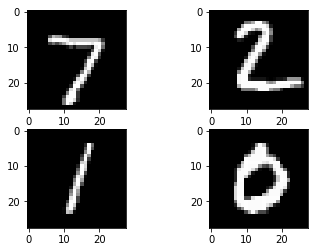

In [4]:
import matplotlib.pyplot as plt
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(test_images[0], cmap='gray')
plt.subplot(222)
plt.imshow(test_images[1], cmap='gray')
plt.subplot(223)
plt.imshow(test_images[2], cmap='gray')
plt.subplot(224)
plt.imshow(test_images[3], cmap='gray')
# show the plot
plt.show()

# Data Preprocessing

## 1. Normalize/Scale data
For a multi-layer feedforward model we must reduce the images down into a vector of pixels. 
Reshape data by flattening 28x28 images to a 784 vector for each image.

The pixel values are gray scale between 0 and 255. Normalize it 0-1 range by dividing 255.

In [5]:
train_images = train_images.reshape((train_images.shape[0], 28 * 28))
train_images = train_images.astype('float32')/255

val_images = train_images[:5000]
train_images = train_images[5000:]

test_images = test_images.reshape((test_images.shape[0], 28*28))
test_images = test_images.astype('float32')/255

## 2. One-hot-encoding on Labels
It is good practice to use a one-hot-encoding of the class values, transforming the vector of class integers into a binary matrix.

In [6]:
from keras.utils import to_categorical

print("Firt 10 Training Labels: {}".format(test_labels[:10]))

train_labels = to_categorical(train_labels)

# Split Validataion set from training set
val_labels = train_labels[:5000]
train_labels = train_labels[5000:]

test_labels = to_categorical(test_labels)

print("After encoding: {}".format(test_labels[:10]))

Firt 10 Training Labels: [7 2 1 0 4 1 4 9 5 9]
After encoding: [[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


## Build a Feed-forward Neural Network

In [7]:
from keras import models
from keras import layers

nn = models.Sequential()

The input layer consists 784 neurons

In [8]:
nn.add(layers.Dense(units=784, activation='sigmoid', input_shape=(28*28,)))

In [9]:
print(nn.output_shape)

(None, 784)


The output layer consists of 10 neurons since we want to classify digits into 10 classes (0 to 9)

In [10]:
nn.add(layers.Dense(units=10, activation='softmax'))

In [11]:
print(nn.output_shape)

(None, 10)


In [12]:
from keras import optimizers

nn.compile(optimizer=optimizers.Adam(lr=0.001),
           loss='categorical_crossentropy',
           metrics=['accuracy']
          )

## Start training

In [13]:
history = nn.fit(train_images, train_labels,
      epochs=10,
      batch_size=128,
      validation_data=(val_images, val_labels),
      verbose=2
      )

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
 - 10s - loss: 0.4428 - acc: 0.8806 - val_loss: 0.2761 - val_acc: 0.9182
Epoch 2/10
 - 9s - loss: 0.2569 - acc: 0.9265 - val_loss: 0.2128 - val_acc: 0.9408
Epoch 3/10
 - 10s - loss: 0.2040 - acc: 0.9400 - val_loss: 0.1727 - val_acc: 0.9518
Epoch 4/10
 - 10s - loss: 0.1642 - acc: 0.9525 - val_loss: 0.1457 - val_acc: 0.9582
Epoch 5/10
 - 10s - loss: 0.1342 - acc: 0.9610 - val_loss: 0.1237 - val_acc: 0.9648
Epoch 6/10
 - 9s - loss: 0.1097 - acc: 0.9685 - val_loss: 0.1145 - val_acc: 0.9680
Epoch 7/10
 - 10s - loss: 0.0906 - acc: 0.9739 - val_loss: 0.1015 - val_acc: 0.9706
Epoch 8/10
 - 9s - loss: 0.0766 - acc: 0.9772 - val_loss: 0.0937 - val_acc: 0.9726
Epoch 9/10
 - 9s - loss: 0.0648 - acc: 0.9812 - val_loss: 0.0824 - val_acc: 0.9734
Epoch 10/10
 - 9s - loss: 0.0541 - acc: 0.9844 - val_loss: 0.0795 - val_acc: 0.9752


In [14]:
nn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


## Evaluation and Test

In [17]:
nn.evaluate(test_images, test_labels)

10000/10000 [==============================] - 2s 164us/step


[0.081302840868569912, 0.97519999999999996]

In [18]:
preds = nn.predict_classes(test_images[:4])
probs = nn.predict_proba(test_images[:4])

print("Predicted Classes: {}".format(preds))
print("Predicted Probabilities:\n {}".format(probs))

Predicted Classes: [7 2 1 0]
Predicted Probabilities:
 [[  1.11434497e-06   9.33532007e-09   1.34320144e-05   3.10329488e-04
    1.46044776e-08   4.46380363e-06   8.91787963e-11   9.99621630e-01
    2.27702076e-05   2.61553632e-05]
 [  3.64010225e-06   9.23414191e-04   9.98629332e-01   2.96562619e-04
    1.44427512e-10   1.00012359e-04   2.42189471e-05   2.67816064e-11
    2.28822209e-05   2.01905478e-10]
 [  5.72864110e-07   9.94812608e-01   2.47634191e-04   1.49351719e-04
    4.25747749e-05   1.08485256e-04   7.76028246e-05   2.54830043e-03
    1.93681801e-03   7.60285111e-05]
 [  9.99456704e-01   1.74804393e-06   5.39883113e-05   1.83309749e-05
    9.57466818e-06   8.33767408e-05   2.15334439e-04   7.30045358e-05
    3.78326126e-06   8.42789013e-05]]
